In [9]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = r'/content/drive/MyDrive/CNN DATA/train'
validation_dir = r'/content/drive/MyDrive/CNN DATA/validation'
test_dir = r'/content/drive/MyDrive/CNN DATA/test'

In [4]:
from tensorflow.keras import datasets, layers, models

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=True,
        seed=40,
        class_mode='categorical') # this was changed from 'binary' class_mode

validation_generator = valid_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=True,
        seed=40,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=False,
    class_mode='categorical'
)

Found 40 images belonging to 1 classes.


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100, #2000/20(batch_size)
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50) #1000/20(batch_size)

Epoch 1/20
100/100 [==============================] - 21s 138ms/step - loss: 0.6932 - acc: 0.5256 - val_loss: 0.6817 - val_acc: 0.5000
Epoch 2/20
100/100 [==============================] - 11s 112ms/step - loss: 0.6752 - acc: 0.5820 - val_loss: 0.6480 - val_acc: 0.6340
Epoch 3/20
100/100 [==============================] - 11s 113ms/step - loss: 0.6378 - acc: 0.6340 - val_loss: 0.6264 - val_acc: 0.6270
Epoch 4/20
100/100 [==============================] - 11s 113ms/step - loss: 0.5997 - acc: 0.6726 - val_loss: 0.5976 - val_acc: 0.6850
Epoch 5/20
100/100 [==============================] - 11s 112ms/step - loss: 0.5634 - acc: 0.6991 - val_loss: 0.5928 - val_acc: 0.6850
Epoch 6/20
100/100 [==============================] - 11s 112ms/step - loss: 0.5328 - acc: 0.7255 - val_loss: 0.5836 - val_acc: 0.7010
Epoch 7/20
100/100 [==============================] - 11s 111ms/step - loss: 0.5277 - acc: 0.7214 - val_loss: 0.5811 - val_acc: 0.6900
Epoch 8/20
100/100 [==============================] - 1

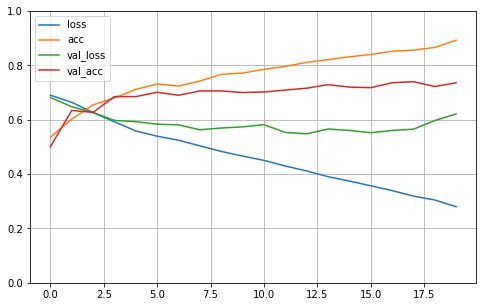

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Evalute the Model

In [ ]:
model.evaluate_generator(generator=validation_generator,
steps=50)
# The array returned:
# [validation_loss, validation_accuracy]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.6211498379707336, 0.7360000014305115]

Predict on the Test Data

In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset() # this is a very important step
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


2/2 [==============================] - 0s 82ms/step


In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)
predicted_class_indices

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1])

In [ ]:
# get the count of 1s
ones = list()
for i in predicted_class_indices:
  if i == 1:
    ones.append(i)
print(len(ones))

18


In [ ]:
# Map the predicted labels with their unique ids such as filenames 
# to find out what was predicted for which image
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
labels

{0: 'cats', 1: 'dogs'}

In [ ]:
# Save result to csv file
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

In [ ]:
from keras.preprocessing.image import img_to_array, load_img

In [ ]:
import cv2
images = list()
IMAGE_SIZE = (150, 150)
imgs = os.listdir('/content/drive/MyDrive/CNN DATA/test/samples')
for img in imgs:
  # Open and resize the img
  single_img = cv2.imread('/content/drive/MyDrive/CNN DATA/test/samples/' + img)
  single_img = cv2.cvtColor(single_img, cv2.COLOR_BGR2RGB)
  single_img = cv2.resize(single_img, IMAGE_SIZE)
  images.append(single_img)
images = np.array(images, dtype = 'int32')

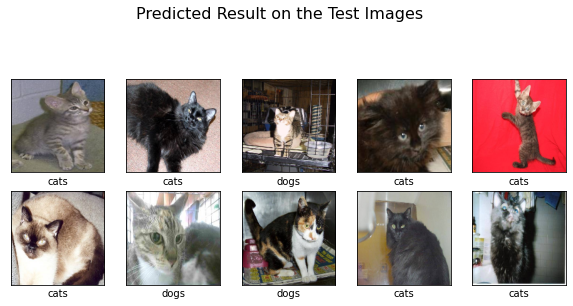

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Predicted Result on the Test Images", fontsize=16)
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(predictions[i])
plt.show()

By visualising the first 10 images, it can be clearly seen that some of the predictions are wrong and that's because our validation accuracy is about 74%, hence, the data will be augmented to improve the performance

Data Augmentation

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=50,
        shuffle=True,
        seed=40,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=50,
        shuffle=True,
        seed=40,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=False,
    class_mode='categorical'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 40 images belonging to 1 classes.


In [8]:
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
# sigmoid with 1 layer output > softmax with 2 layer for
# faster update
model.add(layers.Dense(2, activation='softmax'))  

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [10]:
history = model.fit(
      train_generator,
      steps_per_epoch=40,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=20)

Epoch 1/100
40/40 [==============================] - 154s 4s/step - loss: 0.6913 - acc: 0.5115 - val_loss: 0.6860 - val_acc: 0.5010
Epoch 2/100
40/40 [==============================] - 19s 473ms/step - loss: 0.6885 - acc: 0.5370 - val_loss: 0.6728 - val_acc: 0.5840
Epoch 3/100
40/40 [==============================] - 19s 474ms/step - loss: 0.6775 - acc: 0.5640 - val_loss: 0.6576 - val_acc: 0.6000
Epoch 4/100
40/40 [==============================] - 19s 472ms/step - loss: 0.6752 - acc: 0.5645 - val_loss: 0.6538 - val_acc: 0.6250
Epoch 5/100
40/40 [==============================] - 19s 473ms/step - loss: 0.6664 - acc: 0.5940 - val_loss: 0.6408 - val_acc: 0.6280
Epoch 6/100
40/40 [==============================] - 19s 474ms/step - loss: 0.6583 - acc: 0.6090 - val_loss: 0.6601 - val_acc: 0.5800
Epoch 7/100
40/40 [==============================] - 19s 475ms/step - loss: 0.6442 - acc: 0.6300 - val_loss: 0.6165 - val_acc: 0.6590
Epoch 8/100
40/40 [==============================] - 19s 474ms/s

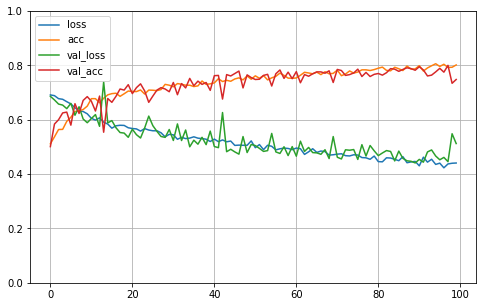

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
model.evaluate_generator(generator=validation_generator,
steps=20)
# The array returned:
# [validation_loss, validation_accuracy]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.5123063325881958, 0.7480000257492065]

In [14]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset() # this is a very important step
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


2/2 [==============================] - 4s 4s/step


In [15]:
predicted_class_indices=np.argmax(pred,axis=1)
predicted_class_indices

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [16]:
# get the count of 1s
ones = list()
for i in predicted_class_indices:
  if i == 1:
    ones.append(i)
print(len(ones))

13


Transfer Learning (VGG16)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=True,
        seed=40,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        shuffle=True,
        seed=40,
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=False,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 40 images belonging to 1 classes.


In [19]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [20]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [22]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [23]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)
      #callbacks=[checkpoint_cb])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 20s 193ms/step - loss: 0.4102 - acc: 0.8018 - val_loss: 0.4420 - val_acc: 0.8010
Epoch 2/30
100/100 [==============================] - 20s 195ms/step - loss: 0.3902 - acc: 0.8236 - val_loss: 0.4404 - val_acc: 0.7940
Epoch 3/30
100/100 [==============================] - 19s 195ms/step - loss: 0.3980 - acc: 0.8118 - val_loss: 0.4381 - val_acc: 0.8020
Epoch 4/30
100/100 [==============================] - 19s 194ms/step - loss: 0.4209 - acc: 0.8137 - val_loss: 0.4439 - val_acc: 0.7930
Epoch 5/30
100/100 [==============================] - 19s 195ms/step - loss: 0.4233 - acc: 0.8107 - val_loss: 0.4435 - val_acc: 0.8140
Epoch 6/30
100/100 [==============================] - 19s 194ms/step - loss: 0.3692 - acc: 0.8368 - val_loss: 0.4501 - val_acc: 0.7940
Epoch 7/30
100/100 [==============================] - 20s 195ms/step - loss: 0.3992 - acc: 0.8124 - val_loss: 0.4567 - val_acc: 0.7850
Epoch 8/30
100/100 [==============================] - 1

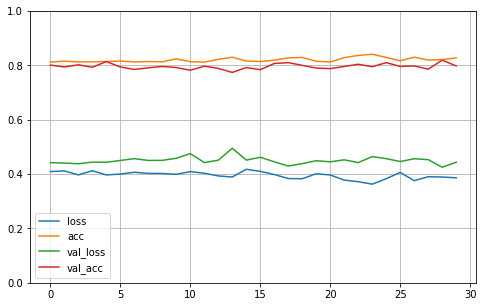

In [24]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [26]:
model.evaluate_generator(generator=validation_generator,
steps=20)
# The array returned:
# [validation_loss, validation_accuracy]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.42638882994651794, 0.8025000095367432]

In [27]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset() # this is a very important step
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


2/2 [==============================] - 0s 75ms/step


In [28]:
predicted_class_indices_aug=np.argmax(pred,axis=1)
predicted_class_indices_aug

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [29]:
# get the count of 1s
ones = list()
for i in predicted_class_indices:
  if i == 1:
    ones.append(i)
print(len(ones))

13


In [30]:
model.save("cats_dogs_model.h5")

In [ ]:
# Reload model
new_model = tf.keras.models.load_model('dogs_vs_cats.h5')

## Conclusion:
- A binary class mode (class_mode = 'binary') can be used as against categorical using a sigmoid activation function
- The model was converted to TFLite to be served in Android